In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Load the dataset
df = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\HNG12\STAGE_0\SampleSuperstore.csv')

In [57]:
# Display the first few rows of the dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [58]:
# Check for missing values
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [59]:
# Basic statistics of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [60]:
# Check unique values in categorical columns
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [61]:
# Set up visual style
sns.set(style="whitegrid")

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


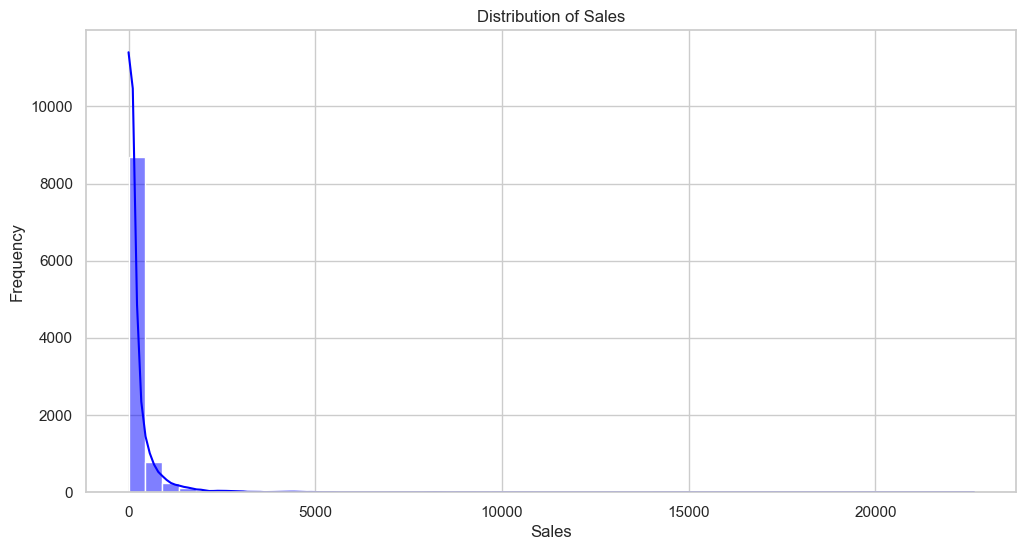

In [62]:
# **Sales and Profit Distribution**
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, kde=True, color='blue')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


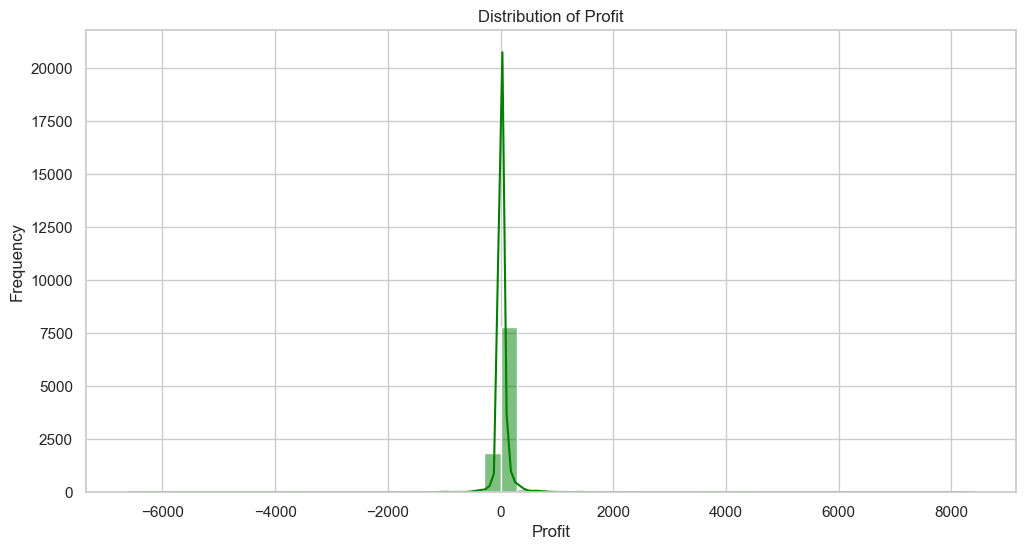

In [63]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Profit'], bins=50, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

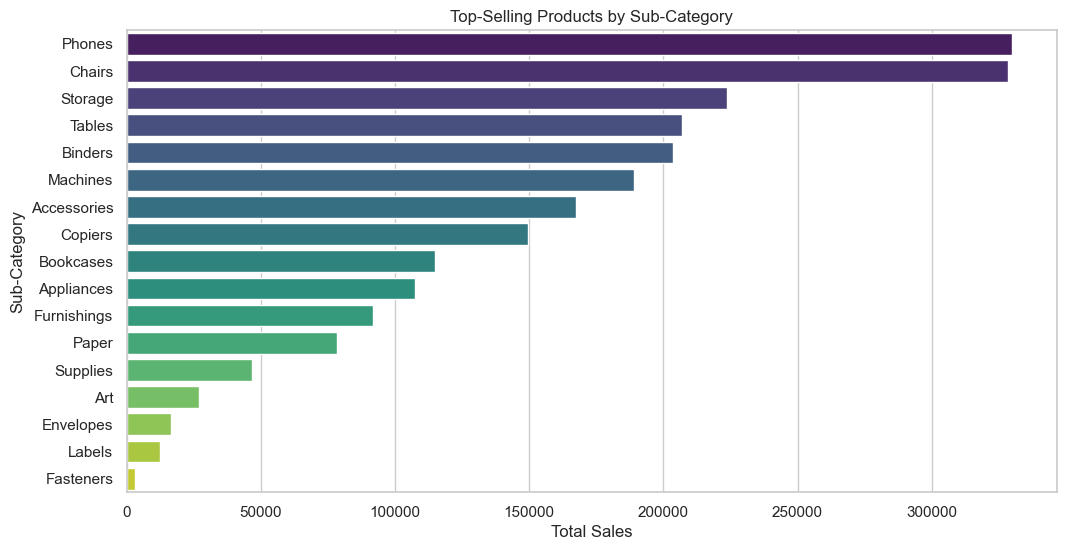

In [64]:
# **Top-Selling Products**
# Group by Sub-Category and sum sales
top_products = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Sub-Category', data=top_products, palette='viridis')
plt.title('Top-Selling Products by Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.show()

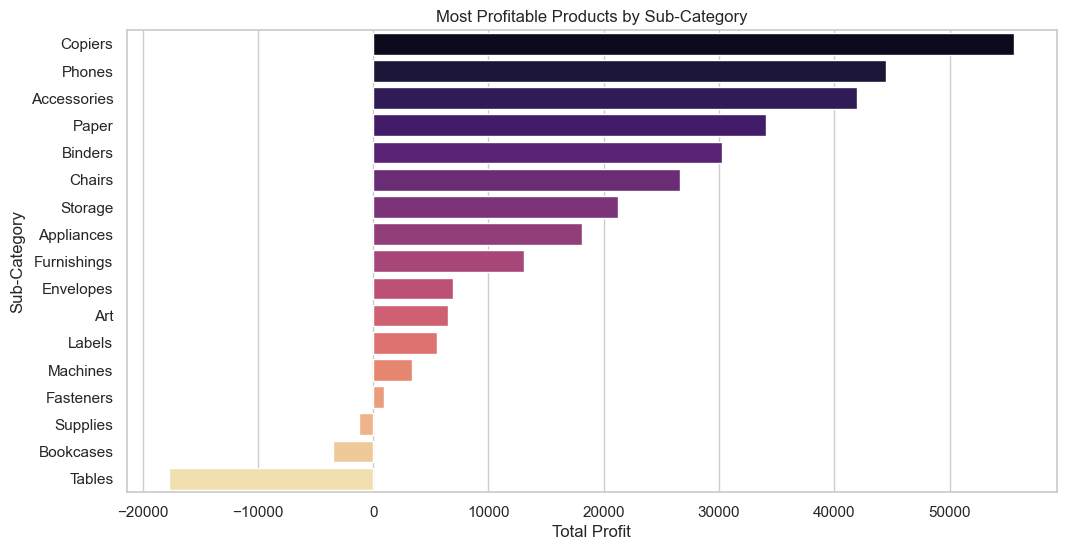

In [65]:
#  **Most Profitable Products**
# Group by Sub-Category and sum profit
top_profitable_products = df.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Sub-Category', data=top_profitable_products, palette='magma')
plt.title('Most Profitable Products by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')
plt.show()

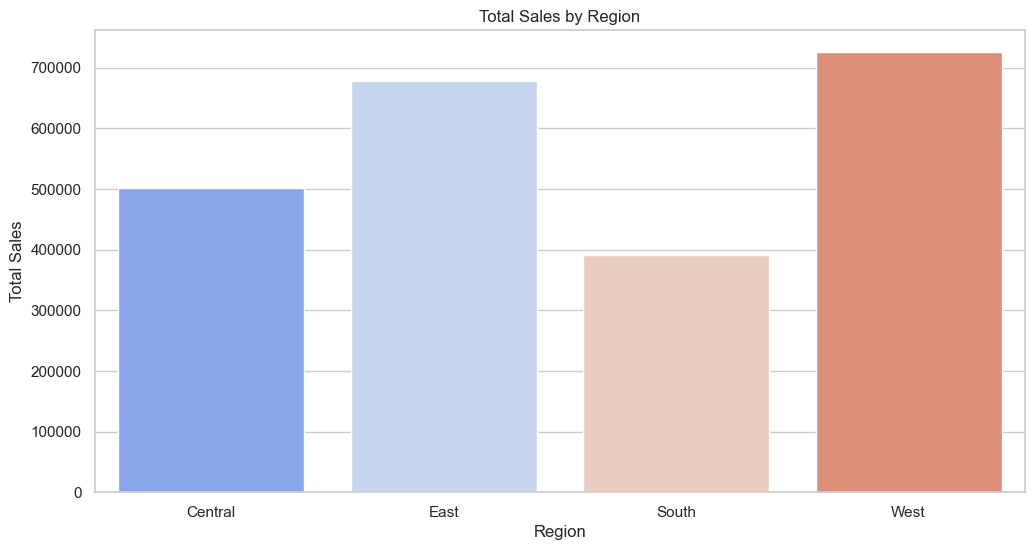

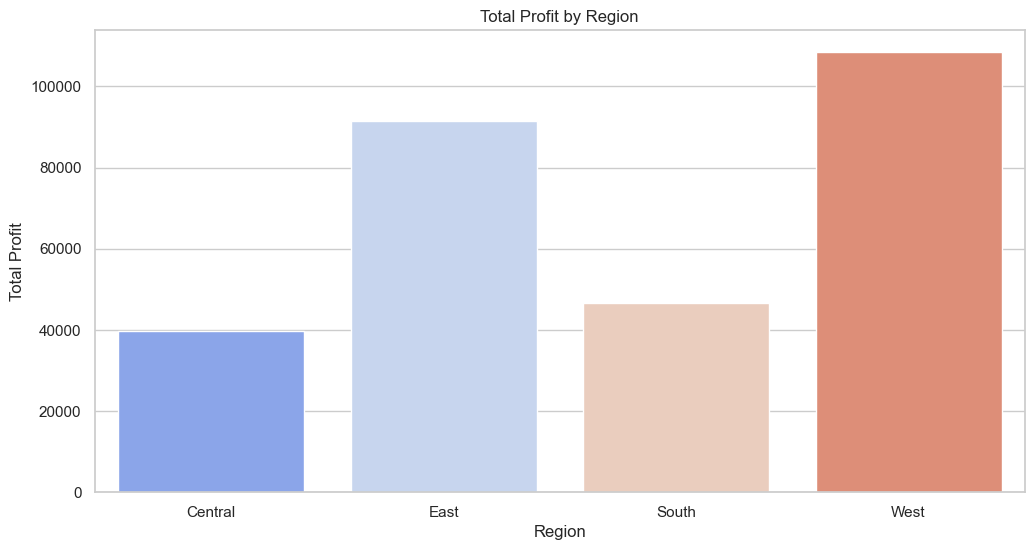

In [66]:
#  **Regional Performance**
# Group by Region and sum sales and profit
region_performance = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=region_performance, palette='coolwarm')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=region_performance, palette='coolwarm')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

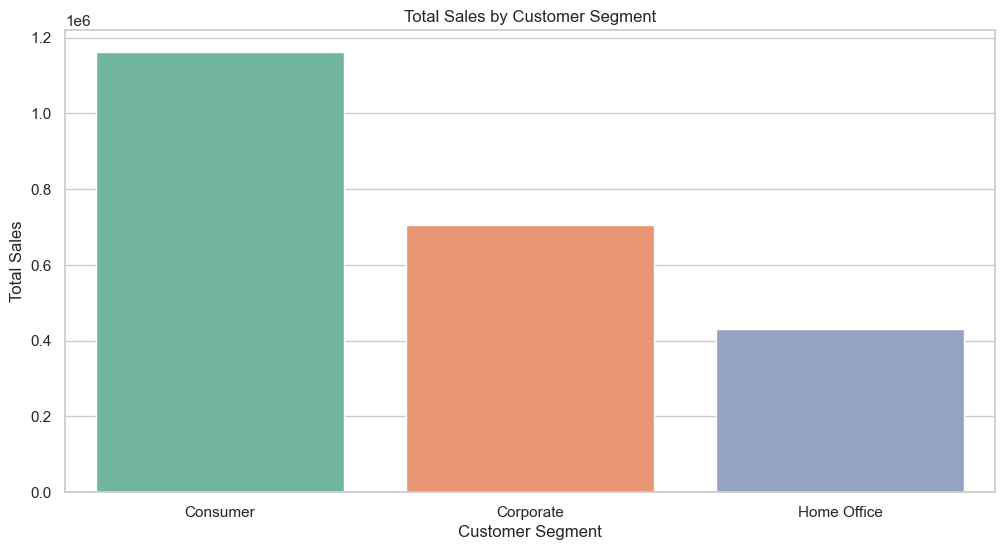

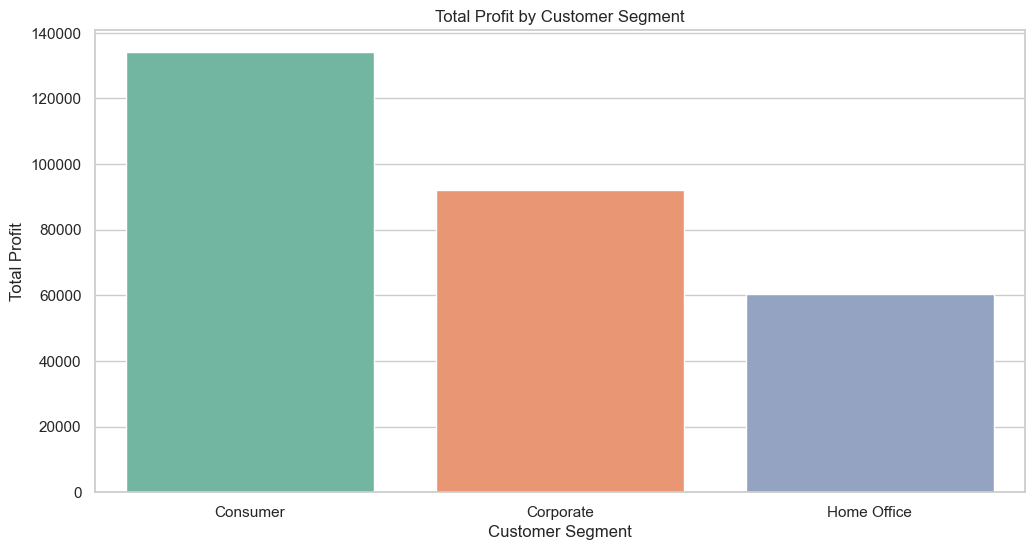

In [67]:
#  **Customer Segment Analysis**
# Group by Segment and sum sales and profit
segment_performance = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=segment_performance, palette='Set2')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Profit', data=segment_performance, palette='Set2')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Profit')
plt.show()

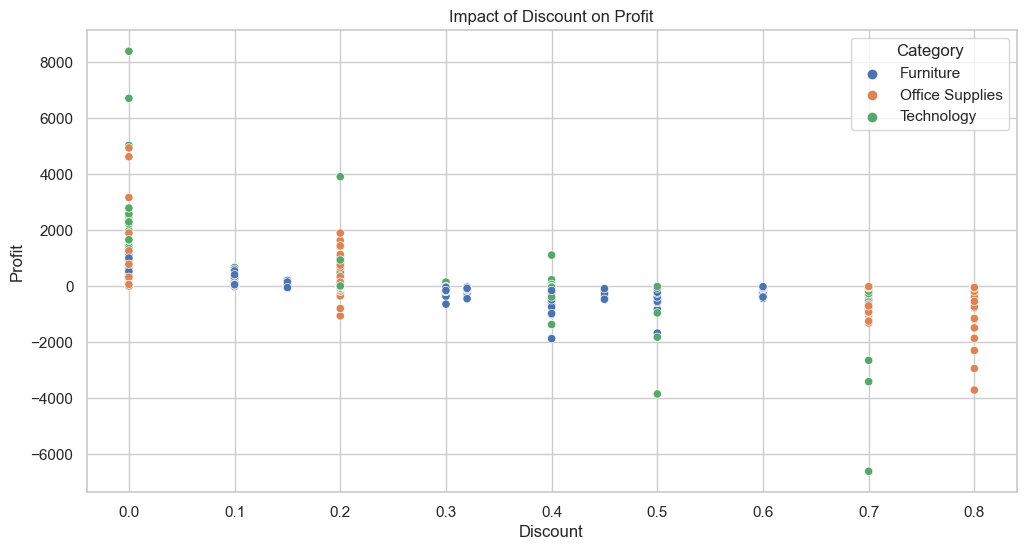

In [68]:
# **Discount Impact on Profit**
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, hue='Category', palette='deep')
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

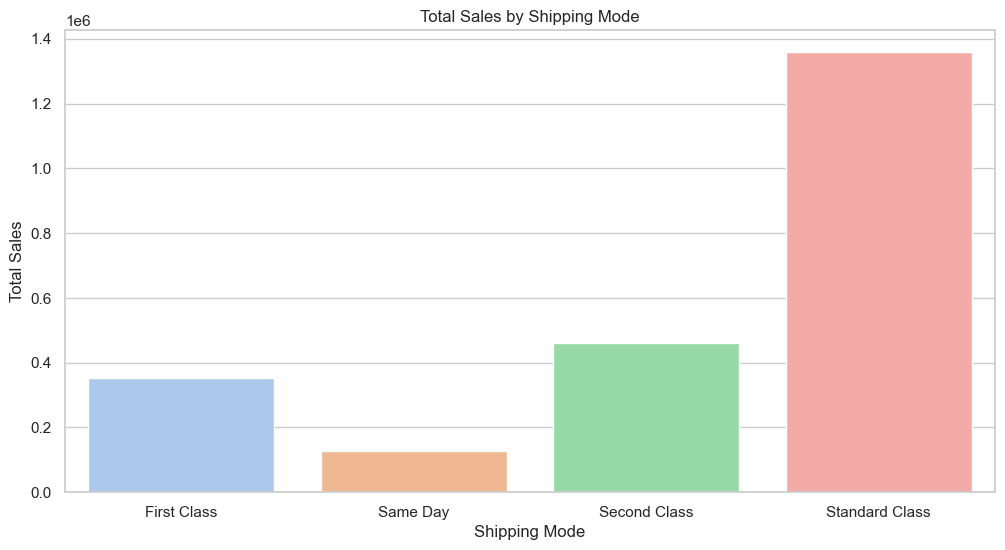

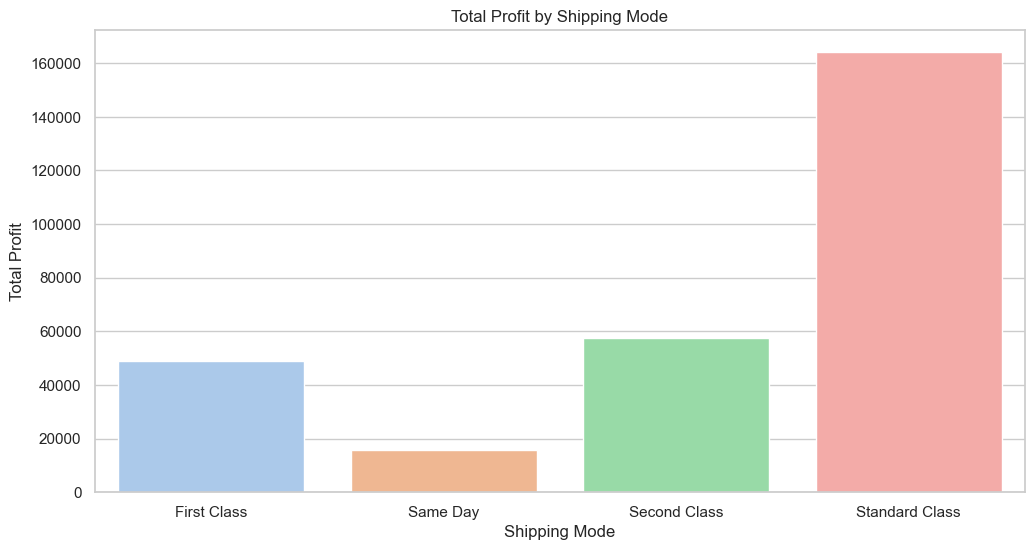

In [69]:
#  **Shipping Mode Analysis**
# Group by Ship Mode and sum sales and profit
shipping_mode_performance = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Sales', data=shipping_mode_performance, palette='pastel')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Profit', data=shipping_mode_performance, palette='pastel')
plt.title('Total Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Profit')
plt.show()

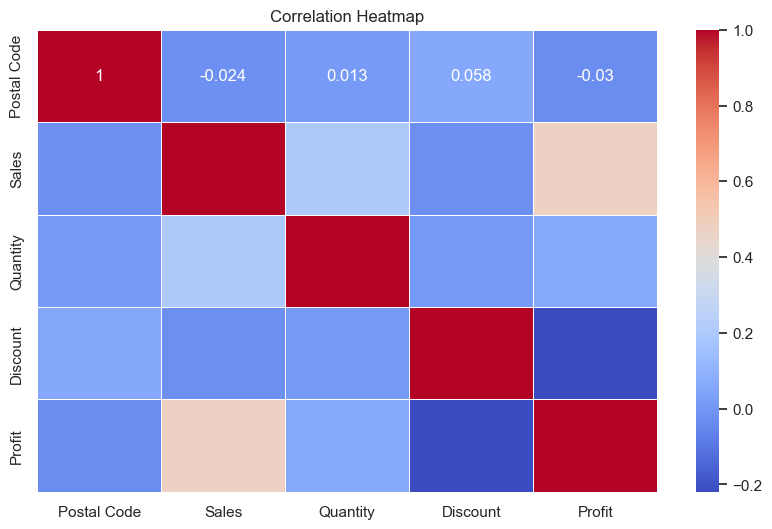

In [71]:
#  **Correlation Heatmap**
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
